In [ ]:
import pandas as pd
import csv
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/countries-aggregated.csv", encoding='utf-8', parse_dates=["Date"])
df['New'] = df["Confirmed"] - df["Confirmed"].shift(+1) 

In [ ]:
df_US = df.loc[df['Country'] == "US"]
df_US['New_confirmed'] = df_US["Confirmed"] - ( df_US["Confirmed"].shift(+1) + 0 )
df_US['New_deaths'] = df_US["Deaths"] - ( df_US["Deaths"].shift(+1) + 0 )
df_US.at[74938, 'New_confirmed'] = df_US.at[74938, 'Confirmed']
df_US.at[74938, 'New_deaths'] = df_US.at[74938, 'Deaths']
df_US.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Country,Confirmed,Recovered,Deaths,New,New_confirmed,New_deaths
74938,2020-01-22,US,1,0,0,-2930553.0,1.0,0.0
74939,2020-01-23,US,1,0,0,0.0,0.0,0.0
74940,2020-01-24,US,2,0,0,1.0,1.0,0.0
74941,2020-01-25,US,2,0,0,0.0,0.0,0.0
74942,2020-01-26,US,5,0,0,3.0,3.0,0.0


In [ ]:
mask = (df_US['Date'] >= '2020-3-1') & (df_US['Date'] < '2020-8-01')
df_US_m = df_US.loc[mask]

In [ ]:
scores_1 = []
scores_2 = []
scores_3 = []

for mon in ['Mar', 'Apr', 'May', 'Jun', 'Jul']:
  last = 31 if (mon == 'Apr' or mon=='Jun') else 32
  for d in range(1,last):
    d_str = ''
    if d < 10:
      d_str += '0'
    d_str += str(d)
    
    d2 = pd.read_csv("/content/drive/MyDrive/covid-project/keyword_based_dataset_no_dup/" + mon + "/" + mon + " " + d_str + ".csv", encoding='utf-8')

    dc = d2['score'].value_counts()
    s = 0
    s2 = 0
    s3 = 0
    for i in d2['score'].value_counts().index.tolist():
      s += i*dc[i]
      if i > 1:
        s2 += dc[i]
      if i > 3:
        s3 += dc[i]
    scores_1.append(s)
    scores_2.append(s2)
    scores_3.append(s3)

In [ ]:
df_US_m['Score'] = scores_1
df_US_m['Score2'] = scores_2
df_US_m['Score3'] = scores_3
df_US_m.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Date,Country,Confirmed,Recovered,Deaths,New,New_confirmed,New_deaths,Score,Score2,Score3
74977,2020-03-01,US,32,7,1,7.0,7.0,0.0,19549,3243,191
74978,2020-03-02,US,55,7,6,23.0,23.0,5.0,3257,519,34
74979,2020-03-03,US,74,7,7,19.0,19.0,1.0,16544,2588,136
74980,2020-03-04,US,107,7,11,33.0,33.0,4.0,19914,3107,202
74981,2020-03-05,US,184,7,12,77.0,77.0,1.0,6453,1052,69


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#April+May new confirmed
fig = go.Figure()
fig.add_traces(go.Line(x=df_US_m['Date'], y = df_US_m['New_confirmed'], mode='markers+lines', name='New_confirmed'))
fig.update_layout(title="No of confirmed cases by date for April(US)")
fig.show()
fig.write_html("No of new confirmed cases April-May(US).html")

#April+May new deaths
fig = go.Figure()
fig.add_traces(go.Line(x=df_US_m['Date'], y = df_US_m['New_deaths'], mode='markers+lines', name='New_deaths'))
fig.update_layout(title="No of new deaths")
fig.show()
fig.write_html("No of new deaths April-May(US).html")

#April+May new deaths
fig = go.Figure()
fig.add_traces(go.Line(x=df_US_m['Date'], y = df_US_m['Score'], mode='markers+lines', name='Hate Score'))
fig.update_layout(title="Hate Score")
fig.show()
fig.write_html("Hate Score April-May(US).html")

#April+May new deaths
fig = go.Figure()
fig.add_traces(go.Line(x=df_US_m['Date'], y = df_US_m['Score2'], mode='markers+lines', name='Hate Score 2'))
fig.update_layout(title="Hate Score 2")
fig.show()
fig.write_html("Hate Score 2 April-May(US).html")

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

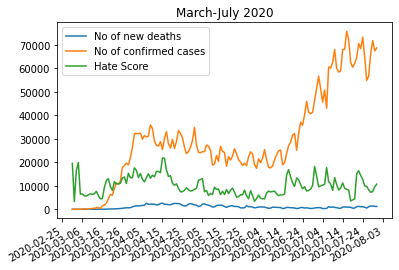

In [ ]:
# Plot Hate Score and Covid deaths/cases
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.ticker as mticker

myLocator = mticker.MultipleLocator(10)


p = plt.figure()
fig, ax = plt.subplots()

# March 0:31
# April 31:61
# May 61:92
# Jun 92:122
# Jul 122:153

plt.plot(df_US_m['Date'].iloc[0:153], df_US_m['New_deaths'].iloc[0:153], label='No of new deaths')
plt.plot(df_US_m['Date'].iloc[0:153], df_US_m['New_confirmed'].iloc[0:153], label='No of confirmed cases')
plt.plot(df_US_m['Date'].iloc[0:153],df_US_m['Score'].iloc[0:153], label='Hate Score')

ax.xaxis.set_major_locator(myLocator)
plt.gcf().autofmt_xdate()

# plt.xticks(ticks=[df_US_m['Date'][0], df_US_m['Date'][5], df_US_m['Date'][15], df_US_m['Date'][20], df_US_m['Date'][25], df_US_m['Date'][31]], labels= [0, 5, 15, 20, 25, 31])
# plt.xticks(ticks=['2020-03-01', '2020-03-05','2020-03-10', '2020-03-15','2020-03-20','2020-03-25','2020-03-31'],labels= [0, 5, 15, 20, 25, 31])
# plt.yticks([])

# # Naming the x-axis, y-axis and the whole graph
# plt.xlabel("Days")
# plt.ylabel("z-scores (modified)")
plt.title("March-July 2020")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

p.savefig("HS_D&C.png", bbox_inches='tight')
files.download('HS_D&C.png')

plt.show()  


In [ ]:
df_US_m.corr()

,Confirmed,Recovered,Deaths,New,New_confirmed,New_deaths,Score,Score2,Score3
Confirmed,1.000000,0.985467,0.943067,0.859170,0.859170,-0.020184,-0.135885,-0.129954,-0.220628
Recovered,0.985467,1.000000,0.892370,0.844208,0.844208,-0.141577,-0.117846,-0.115132,-0.187040
Deaths,0.943067,0.892370,1.000000,0.728011,0.728011,0.018322,-0.231981,-0.206475,-0.300420
New,0.859170,0.844208,0.728011,1.000000,1.000000,0.249276,0.136442,0.137435,0.050187
New_confirmed,0.859170,0.844208,0.728011,1.000000,1.000000,0.249276,0.136442,0.137435,0.050187
New_deaths,-0.020184,-0.141577,0.018322,0.249276,0.249276,1.000000,0.231990,0.236943,0.140032
Score,-0.135885,-0.117846,-0.231981,0.136442,0.136442,0.231990,1.000000,0.973246,0.819199
Score2,-0.129954,-0.115132,-0.206475,0.137435,0.137435,0.236943,0.973246,1.000000,0.810954
Score3,-0.220628,-0.187040,-0.300420,0.050187,0.050187,0.140032,0.819199,0.810954,1.000000


In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_US_m.New_confirmed.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_US_m.New_confirmed.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df_US_m.Score3.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_US_m.Score3.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.1755212339718377
p-value: 0.6840362397469235
Critial Values:
   1%, -3.4782936965183815
Critial Values:
   5%, -2.882567574015525
Critial Values:
   10%, -2.5779830117488745

KPSS Statistic: 0.794319
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

ADF Statistic: -3.0991209635611803
p-value: 0.026618309544834556
Critial Values:
   1%, -3.4750180242954167
Critial Values:
   5%, -2.8811408028842043
Critial Values:
   10%, -2.577221358046935

KPSS Statistic: 0.223477
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In [ ]:
df_US_m['New_con_diff'] = df_US_m.New_confirmed.diff(1)
df_US_m['New_con_diff'] = df_US_m.New_con_diff.fillna(0)
# df_US_m['Score3_diff'] = df_US_m.Score3.diff()
# df_US_m['Score3_diff'] = df_US_m.Score3_diff.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_US_m['Score3_diff'] = df_US_m.Score3
df_US_m['Score3_diff'] = df_US_m.Score3_diff.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# ADF Test
result = adfuller(df_US_m.New_con_diff.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_US_m.New_con_diff.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df_US_m.Score3_diff.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df_US_m.Score3_diff.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.8202877593346651
p-value: 0.37043691267509915
Critial Values:
   1%, -3.47864788917503
Critial Values:
   5%, -2.882721765644168
Critial Values:
   10%, -2.578065326612056

KPSS Statistic: 0.131827
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

ADF Statistic: -3.0991209635611803
p-value: 0.026618309544834556
Critial Values:
   1%, -3.4750180242954167
Critial Values:
   5%, -2.8811408028842043
Critial Values:
   10%, -2.577221358046935

KPSS Statistic: 0.223477
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



In [ ]:
df_US_m

,Date,Country,Confirmed,Recovered,Deaths,New,New_confirmed,New_deaths,Score,Score2,Score3,New_con_diff
74977,2020-03-01,US,32,7,1,7.0,7.0,0.0,19549,3243,191,0.0
74978,2020-03-02,US,55,7,6,23.0,23.0,5.0,3257,519,34,16.0
74979,2020-03-03,US,74,7,7,19.0,19.0,1.0,16544,2588,136,-4.0
74980,2020-03-04,US,107,7,11,33.0,33.0,4.0,19914,3107,202,14.0
74981,2020-03-05,US,184,7,12,77.0,77.0,1.0,6453,1052,69,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75125,2020-07-27,US,4292931,1325804,148900,56757.0,56757.0,1120.0,8297,1407,48,1890.0
75126,2020-07-28,US,4359390,1355363,150241,66459.0,66459.0,1341.0,7252,1324,48,9702.0
75127,2020-07-29,US,4431244,1389425,151668,71854.0,71854.0,1427.0,7536,1462,42,5395.0
75128,2020-07-30,US,4498699,1414155,152894,67455.0,67455.0,1226.0,9511,1932,90,-4399.0


In [ ]:
df_US_m.corr()

,Confirmed,Recovered,Deaths,New,New_confirmed,New_deaths,Score,Score2,Score3,New_con_diff
Confirmed,1.000000,0.985467,0.943067,0.859170,0.859170,-0.020184,-0.135885,-0.129954,-0.220628,0.018243
Recovered,0.985467,1.000000,0.892370,0.844208,0.844208,-0.141577,-0.117846,-0.115132,-0.187040,0.034898
Deaths,0.943067,0.892370,1.000000,0.728011,0.728011,0.018322,-0.231981,-0.206475,-0.300420,0.007987
New,0.859170,0.844208,0.728011,1.000000,1.000000,0.249276,0.136442,0.137435,0.050187,0.127916
New_confirmed,0.859170,0.844208,0.728011,1.000000,1.000000,0.249276,0.136442,0.137435,0.050187,0.127916
New_deaths,-0.020184,-0.141577,0.018322,0.249276,0.249276,1.000000,0.231990,0.236943,0.140032,0.050434
Score,-0.135885,-0.117846,-0.231981,0.136442,0.136442,0.231990,1.000000,0.973246,0.819199,0.128819
Score2,-0.129954,-0.115132,-0.206475,0.137435,0.137435,0.236943,0.973246,1.000000,0.810954,0.134361
Score3,-0.220628,-0.187040,-0.300420,0.050187,0.050187,0.140032,0.819199,0.810954,1.000000,0.080578
New_con_diff,0.018243,0.034898,0.007987,0.127916,0.127916,0.050434,0.128819,0.134361,0.080578,1.000000


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df_US_m[['Score3', 'New_con_diff']], maxlag=16)

In [ ]:
grangercausalitytests(df_US_m[['Score', 'New_con_diff']], maxlag=16)

In [ ]:
grangercausalitytests(df_US_m[['Score', 'New_deaths']], maxlag=16)

GRANGER CAUSALITY USING Z-SCORE


In [ ]:
df1 = df_US_m
# df1=df1.drop(['Date'],axis=1)
rolling_mean = df1['Score'].rolling(window=7).mean()
rolling_std = df1['Score'].rolling(window=7).std()

z = (df1['Score'].astype(float) - rolling_mean) / (rolling_std) 
df1['Peaks_Score'] = z

rolling_mean = df1['New_deaths'].rolling(window=7).mean()
rolling_std = df1['New_deaths'].rolling(window=7).std()

z = (df1['New_deaths'].astype(float) - rolling_mean) / (rolling_std) 
df1['Peaks_New_deaths'] = z

rolling_mean = df1['New_confirmed'].rolling(window=7).mean()
rolling_std = df1['New_confirmed'].rolling(window=7).std()

z = (df1['New_confirmed'].astype(float) - rolling_mean) / (rolling_std) 
df1['Peaks_New_confirmed'] = z

rolling_mean = df1['Confirmed'].rolling(window=7).mean()
rolling_std = df1['Confirmed'].rolling(window=7).std()

z = (df1['Confirmed'].astype(float) - rolling_mean) / (rolling_std) 
df1['Peaks_Confirmed'] = z



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [ ]:
from sklearn import preprocessing
import statistics
import math
from scipy import special
import matplotlib.pyplot as plt
import seaborn as sns

def Regularize(Score):
  f,x = np.histogram(Score)
  mxF = np.max(f)
  ind = np.where(f == mxF)
  s = (x[1]-x[0])/2
  baseS = x[ind[0]]-s
  regScore = Score - baseS
  regScore[regScore<0] = 0
  return regScore
  

def Normalize(Score):
  minS = np.min(Score)
  maxS = np.max(Score)
  normScore = (Score-minS) / (maxS-minS)
  return normScore


def Unify(Score):
  mu = np.mean(Score)
  sigma = np.std(Score)
  temp = (Score-mu)/(sigma*(math.sqrt(2)))
  uniScore = special.erf(temp)
  uniScore[uniScore < 0] = 0
  return uniScore


x = df1['Peaks_Score']
x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)

mn = np.min(x)
mx = np.max(x)

if(mn==0 and mx > 1):
  x = Normalize(x)  


x = Unify(x) 

ZS = pd.DataFrame({'Score': x})

x = df1['Peaks_New_deaths']
x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)

mn = np.min(x)
mx = np.max(x)

if(mn==0 and mx > 1):
  x = Normalize(x)  


x = Unify(x) 

ZS['New_deaths'] = x

x = df1['Peaks_Confirmed']
x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)

mn = np.min(x)
mx = np.max(x)

if(mn==0 and mx > 1):
  x = Normalize(x)  


x = Unify(x) 

ZS['Confirmed'] = x

x = df1['Peaks_New_confirmed']
x = x[~np.isnan(x)]
mn = np.min(x)
mx = np.max(x)
Inf = float('inf')
if(abs(mn) > 0 and mx < Inf):
  x = Regularize(x)

mn = np.min(x)
mx = np.max(x)

if(mn==0 and mx > 1):
  x = Normalize(x)  


x = Unify(x) 

ZS['New_confirmed'] = x


In [ ]:
from google.colab import files

ZS.to_csv('ZS.csv')
files.download('ZS.csv')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Z-score Deaths&Cases.csv") # Sheet containing Hate Score, COVID19 deaths/cases Z-score
df = df.iloc[: , 1:]
df

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# ADF Test
result = adfuller(df.Score.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Score.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df.New_deaths.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.New_deaths.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df.Confirmed.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Confirmed.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df.New_confirmed.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.New_confirmed.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')        

ADF Statistic: -6.661218861545826
p-value: 4.841707219687484e-09
Critial Values:
   1%, -3.477261624048995
Critial Values:
   5%, -2.8821181874544233
Critial Values:
   10%, -2.5777431104939494

KPSS Statistic: 0.251812
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

ADF Statistic: -1.5461226683084912
p-value: 0.5105843887521841
Critial Values:
   1%, -3.47864788917503
Critial Values:
   5%, -2.882721765644168
Critial Values:
   10%, -2.578065326612056

KPSS Statistic: 0.524241
p-value: 0.036207
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

ADF Statistic: -3.465746826989783
p-value: 0.008911617926237403
Critial Values:
   1%, -3.4793722137854926
Critial Values:
   5%, -2.8830370378332995
Critial Values:
   10%, -2.578233635380623

KPSS Statistic: 0.532421
p-value: 0.034365
Critial Values:
   10%, 0.347
Critial Values:
   5%,

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [ ]:
df['New_con_diff'] = df.New_confirmed.diff()
df['New_con_diff'] = df.New_con_diff.fillna(0)
df['Score_diff'] = df.Score.diff()
df['Score_diff'] = df.Score_diff.fillna(0)
df['New_dea_diff'] = df.New_deaths.diff()
df['New_dea_diff'] = df.New_dea_diff.fillna(0)
df['Con_diff'] = df.Confirmed.diff()
df['Con_diff'] = df.Con_diff.fillna(0)

df

,Score,New_deaths,Confirmed,New_confirmed,New_con_diff,Score_diff,New_dea_diff,Con_diff
0,0.000000,0.000000,0.999909,0.997415,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.010967,0.949889,0.000000,-0.997415,0.000000,0.010967,-0.050020
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.010967,-0.949889
3,0.000000,0.925814,0.632383,0.707440,0.707440,0.000000,0.925814,0.632383
4,0.211748,0.346537,0.997343,0.996003,0.288563,0.211748,-0.579276,0.364960
...,...,...,...,...,...,...,...,...
142,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
143,0.000000,0.576956,0.000000,0.000000,0.000000,0.000000,0.576956,0.000000
144,0.000000,0.649024,0.000000,0.000000,0.000000,0.000000,0.072068,0.000000
145,0.051055,0.000000,0.000000,0.000000,0.000000,0.051055,-0.649024,0.000000


In [ ]:
# ADF Test
result = adfuller(df.Score_diff.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Score_diff.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df.New_dea_diff.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.New_dea_diff.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df.Con_diff.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Con_diff.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# ADF Test
result = adfuller(df.New_con_diff.values, autolag='AIC')
print(f'\nADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.New_con_diff.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')   

ADF Statistic: -6.758022227656374
p-value: 2.838864288235165e-09
Critial Values:
   1%, -3.480118600110386
Critial Values:
   5%, -2.8833618426136196
Critial Values:
   10%, -2.578407034974382

KPSS Statistic: 0.080591
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

ADF Statistic: -5.544720774164829
p-value: 1.6708792838767256e-06
Critial Values:
   1%, -3.4782936965183815
Critial Values:
   5%, -2.882567574015525
Critial Values:
   10%, -2.5779830117488745

KPSS Statistic: 0.099039
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739

ADF Statistic: -3.8472723169843936
p-value: 0.0024590470746274477
Critial Values:
   1%, -3.480118600110386
Critial Values:
   5%, -2.8833618426136196
Critial Values:
   10%, -2.578407034974382

KPSS Statistic: 0.251464
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning: p-valu

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

grangercausalitytests(df[['Score', 'New_confirmed']], maxlag=16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0020  , p=0.9644  , df_denom=143, df_num=1
ssr based chi2 test:   chi2=0.0020  , p=0.9640  , df=1
likelihood ratio test: chi2=0.0020  , p=0.9640  , df=1
parameter F test:         F=0.0020  , p=0.9644  , df_denom=143, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4019  , p=0.6698  , df_denom=140, df_num=2
ssr based chi2 test:   chi2=0.8325  , p=0.6595  , df=2
likelihood ratio test: chi2=0.8302  , p=0.6603  , df=2
parameter F test:         F=0.4019  , p=0.6698  , df_denom=140, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3389  , p=0.7972  , df_denom=137, df_num=3
ssr based chi2 test:   chi2=1.0686  , p=0.7847  , df=3
likelihood ratio test: chi2=1.0647  , p=0.7856  , df=3
parameter F test:         F=0.3389  , p=0.7972  , df_denom=137, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7442  , p=0.5635  

{1: ({'lrtest': (0.002037433164389313, 0.9639973645689907, 1),
   'params_ftest': (0.0019955820235581204, 0.9644311218151711, 143.0, 1.0),
   'ssr_chi2test': (0.002037447380690503, 0.9639972390493133, 1),
   'ssr_ftest': (0.001995582023553027, 0.9644311218154539, 143.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (0.8301653587704436, 0.6602856864334785, 2),
   'params_ftest': (0.4019189345606902, 0.6698044441897757, 140.0, 2.0),
   'ssr_chi2test': (0.8325463644471477, 0.6595000821744925, 2),
   'ssr_ftest': (0.401918934560692, 0.6698044441897704, 140.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (1.0646833156648654, 0.7856057736824047, 3),
   'params_ftest': (0.33889391053756995, 0.7972326211527209, 137.0, 3.0),
   'ssr_chi2test': (1.0686289733739132, 0.7846520553513091, 3),
   'ssr_ftest': (0.33889391053756046, 0.7972326211527283, 137.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0.

In [ ]:
grangercausalitytests(df[['Score', 'Confirmed']], maxlag=16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.9102  , p=0.3417  , df_denom=143, df_num=1
ssr based chi2 test:   chi2=0.9293  , p=0.3350  , df=1
likelihood ratio test: chi2=0.9264  , p=0.3358  , df=1
parameter F test:         F=0.9102  , p=0.3417  , df_denom=143, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2737  , p=0.1067  , df_denom=140, df_num=2
ssr based chi2 test:   chi2=4.7098  , p=0.0949  , df=2
likelihood ratio test: chi2=4.6349  , p=0.0985  , df=2
parameter F test:         F=2.2737  , p=0.1067  , df_denom=140, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6027  , p=0.1916  , df_denom=137, df_num=3
ssr based chi2 test:   chi2=5.0537  , p=0.1679  , df=3
likelihood ratio test: chi2=4.9671  , p=0.1742  , df=3
parameter F test:         F=1.6027  , p=0.1916  , df_denom=137, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5276  , p=0.1977  

{1: ({'lrtest': (0.9263968220988659, 0.33580096220319705, 1),
   'params_ftest': (0.91024605620877, 0.3416591160771274, 143.0, 1.0),
   'ssr_chi2test': (0.9293421273180302, 0.33503393124433806, 1),
   'ssr_ftest': (0.9102460562087558, 0.3416591160771274, 143.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (4.634933352157077, 0.0985228600427551, 2),
   'params_ftest': (2.2736999107822378, 0.10671921718381701, 140.0, 2.0),
   'ssr_chi2test': (4.709806958048895, 0.09490266619048979, 2),
   'ssr_ftest': (2.2736999107822253, 0.10671921718381912, 140.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (4.967088038245436, 0.174223044256587, 3),
   'params_ftest': (1.6026932681694541, 0.19163070988506029, 137.0, 3.0),
   'ssr_chi2test': (5.053748115687615, 0.16790348603999836, 3),
   'ssr_ftest': (1.6026932681694521, 0.19163070988506029, 137.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0.,

In [ ]:
grangercausalitytests(df[['Score', 'New_deaths']], maxlag=16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4405  , p=0.1205  , df_denom=143, df_num=1
ssr based chi2 test:   chi2=2.4917  , p=0.1145  , df=1
likelihood ratio test: chi2=2.4706  , p=0.1160  , df=1
parameter F test:         F=2.4405  , p=0.1205  , df_denom=143, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7002  , p=0.1864  , df_denom=140, df_num=2
ssr based chi2 test:   chi2=3.5218  , p=0.1719  , df=2
likelihood ratio test: chi2=3.4797  , p=0.1755  , df=2
parameter F test:         F=1.7002  , p=0.1864  , df_denom=140, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5975  , p=0.1929  , df_denom=137, df_num=3
ssr based chi2 test:   chi2=5.0373  , p=0.1691  , df=3
likelihood ratio test: chi2=4.9512  , p=0.1754  , df=3
parameter F test:         F=1.5975  , p=0.1929  , df_denom=137, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3470  , p=0.2559  

{1: ({'lrtest': (2.470632847363561, 0.11599121452263692, 1),
   'params_ftest': (2.440457063501868, 0.12045212667321574, 143.0, 1.0),
   'ssr_chi2test': (2.4916554634354773, 0.11445128160148141, 1),
   'ssr_ftest': (2.4404570635018716, 0.12045212667321574, 143.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.47967631676363, 0.17554880942145865, 2),
   'params_ftest': (1.7001621960231774, 0.18640310127506515, 140.0, 2.0),
   'ssr_chi2test': (3.5217645489051304, 0.1718931399758834, 2),
   'ssr_ftest': (1.7001621960231665, 0.18640310127506515, 140.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (4.9512268372538415, 0.17540359146914056, 3),
   'params_ftest': (1.5974869658860518, 0.19286269578594, 137.0, 3.0),
   'ssr_chi2test': (5.037331162501992, 0.16908389395558693, 3),
   'ssr_ftest': (1.5974869658860487, 0.19286269578594, 137.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 

In [ ]:
grangercausalitytests(df[['Score_diff', 'New_con_diff']], maxlag=16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1004  , p=0.7518  , df_denom=143, df_num=1
ssr based chi2 test:   chi2=0.1025  , p=0.7488  , df=1
likelihood ratio test: chi2=0.1025  , p=0.7489  , df=1
parameter F test:         F=0.1004  , p=0.7518  , df_denom=143, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9318  , p=0.3963  , df_denom=140, df_num=2
ssr based chi2 test:   chi2=1.9301  , p=0.3810  , df=2
likelihood ratio test: chi2=1.9174  , p=0.3834  , df=2
parameter F test:         F=0.9318  , p=0.3963  , df_denom=140, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8813  , p=0.4526  , df_denom=137, df_num=3
ssr based chi2 test:   chi2=2.7790  , p=0.4270  , df=3
likelihood ratio test: chi2=2.7526  , p=0.4314  , df=3
parameter F test:         F=0.8813  , p=0.4526  , df_denom=137, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5900  , p=0.6705  

{1: ({'lrtest': (0.1024784919076751, 0.7488753788457491, 1),
   'params_ftest': (0.10040800391331545, 0.7518026924938696, 143.0, 1.0),
   'ssr_chi2test': (0.10251446553386727, 0.748832791263545, 1),
   'ssr_ftest': (0.10040800391330836, 0.7518026924938696, 143.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (1.9174065837746639, 0.3833897083338152, 2),
   'params_ftest': (0.931791751070363, 0.39627591405446183, 140.0, 2.0),
   'ssr_chi2test': (1.9301400557885808, 0.38095652122223056, 2),
   'ssr_ftest': (0.9317917510703494, 0.39627591405446816, 140.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (2.752564881396779, 0.43136822471718106, 3),
   'params_ftest': (0.8813162415054565, 0.4525544747757948, 137.0, 3.0),
   'ssr_chi2test': (2.7790409951120894, 0.42696177410586855, 3),
   'ssr_ftest': (0.8813162415054543, 0.45255447477580024, 137.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.

In [ ]:
grangercausalitytests(df[['Score_diff', 'New_dea_diff']], maxlag=16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5266  , p=0.4692  , df_denom=143, df_num=1
ssr based chi2 test:   chi2=0.5376  , p=0.4634  , df=1
likelihood ratio test: chi2=0.5366  , p=0.4638  , df=1
parameter F test:         F=0.5266  , p=0.4692  , df_denom=143, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4729  , p=0.2328  , df_denom=140, df_num=2
ssr based chi2 test:   chi2=3.0510  , p=0.2175  , df=2
likelihood ratio test: chi2=3.0194  , p=0.2210  , df=2
parameter F test:         F=1.4729  , p=0.2328  , df_denom=140, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4370  , p=0.2347  , df_denom=137, df_num=3
ssr based chi2 test:   chi2=4.5311  , p=0.2095  , df=3
likelihood ratio test: chi2=4.4613  , p=0.2158  , df=3
parameter F test:         F=1.4370  , p=0.2347  , df_denom=137, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8958  , p=0.1148  

{1: ({'lrtest': (0.5366363151501901, 0.46383009935879693, 1),
   'params_ftest': (0.526576689037123, 0.4692355756094224, 143.0, 1.0),
   'ssr_chi2test': (0.5376237524435156, 0.46341919226885464, 1),
   'ssr_ftest': (0.5265766890371419, 0.469235575609409, 143.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (3.0193811889616313, 0.22097833930094454, 2),
   'params_ftest': (1.472914560431142, 0.23278679246794112, 140.0, 2.0),
   'ssr_chi2test': (3.05103730375025, 0.2175082165609703, 2),
   'ssr_ftest': (1.472914560431155, 0.2327867924679369, 140.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (4.46132104666367, 0.21576641839690033, 3),
   'params_ftest': (1.4369616941779093, 0.23473716574341372, 137.0, 3.0),
   'ssr_chi2test': (4.531149283831071, 0.20952861406874626, 3),
   'ssr_ftest': (1.436961694177909, 0.23473716574341372, 137.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

In [ ]:
grangercausalitytests(df[['Score_diff', 'Con_diff']], maxlag=16)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.1987  , p=0.1403  , df_denom=143, df_num=1
ssr based chi2 test:   chi2=2.2448  , p=0.1341  , df=1
likelihood ratio test: chi2=2.2277  , p=0.1356  , df=1
parameter F test:         F=2.1987  , p=0.1403  , df_denom=143, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1037  , p=0.1258  , df_denom=140, df_num=2
ssr based chi2 test:   chi2=4.3576  , p=0.1132  , df=2
likelihood ratio test: chi2=4.2934  , p=0.1169  , df=2
parameter F test:         F=2.1037  , p=0.1258  , df_denom=140, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7346  , p=0.1628  , df_denom=137, df_num=3
ssr based chi2 test:   chi2=5.4697  , p=0.1405  , df=3
likelihood ratio test: chi2=5.3684  , p=0.1467  , df=3
parameter F test:         F=1.7346  , p=0.1628  , df_denom=137, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.1585  , p=0.0771  

{1: ({'lrtest': (2.227715575296372, 0.13555413594311252, 1),
   'params_ftest': (2.1986719672926553, 0.14033020729261897, 143.0, 1.0),
   'ssr_chi2test': (2.244797952620486, 0.1340644186846661, 1),
   'ssr_ftest': (2.1986719672926682, 0.14033020729261844, 143.0, 1)},
   array([[0., 1., 0.]])]),
 2: ({'lrtest': (4.293430772081081, 0.11686739230837741, 2),
   'params_ftest': (2.1036818914751096, 0.12584670778748372, 140.0, 2.0),
   'ssr_chi2test': (4.357626775198428, 0.11317574673800597, 2),
   'ssr_ftest': (2.103681891475103, 0.12584670778748372, 140.0, 2)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'lrtest': (5.36838995458254, 0.14672572329586017, 3),
   'params_ftest': (1.7346081381483363, 0.16280322938164224, 137.0, 3.0),
   'ssr_chi2test': (5.469713253139274, 0.14046136419930197, 3),
   'ssr_ftest': (1.7346081381483343, 0.16280322938164374, 137.0, 3)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0